# HOMEWORK 1
## Mohammad Sadegh Ghasemi
### Problems are in file ANN-97-1-Hw1.pdf and Solutions are written in ANN-97-1-Hw1_Solutions.pdf

## QUESTION 1
## تمرین ۱-الف
#### PERCEPTROP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron

#### EXAMPLE 1

In [2]:
# INPUT DATA
X = np.array([
    [1, -1, -1, -1],
    [1, 1, -1, -1],
    [1, 1, 1, 1]])
# DESIRED (REAL) OUTPUT
Y = np.array([1, -1, 1])

perceptron = Perceptron()
perceptron.fit(X, Y)
print(f'W: {perceptron.w_}')

W: [ 1.01624345  0.99388244 -3.00528172  0.98927031  1.00865408]


#### EXAMPLE 2

In [3]:
# INPUT DATA
P = np.array(
    [
        [0.7, 0.2],
        [-0.1, 0.9],
        [-0.3, 0.3],
        [0.1, 0.2],
        [0.5, -0.5]
    ])
# DESIRED OUTPUT
T = np.array([1, 1, -1, -1, -1])

perceptron.fit(P, T)
print(f'W: {perceptron.w_}')

W: [-2.98375655  4.49388244  4.39471828]


#### VISUALIZATION

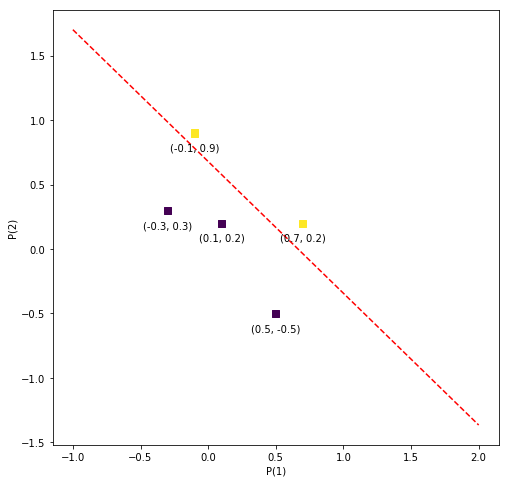

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.scatter(P[:, 0], P[:, 1], c=T, marker='s', s=50)
for p in P:
    plt.annotate(
        '(%s, %s)' % (p[0], p[1]), 
        xy=(p[0], p[1]), 
        xytext=(0, -10),
        textcoords='offset points', 
        ha='center', 
        va='top')
plt.xlabel('P(1)')
plt.ylabel('P(2)')

W = perceptron.w_
# DECISION BOUNDARY
P1 = [round(min(P[:, 0]) - 1), round(max(P[:, 0]) + 1)]
P2 = [-((W[1] * p1) + W[0]) / W[2] for p1 in P1]

plt.plot(P1, P2, 'r--')


## Q1_3
## تمرین ۱-ج
### IRIS DATA SET CLASSIFICATION USING PERCEPTRON

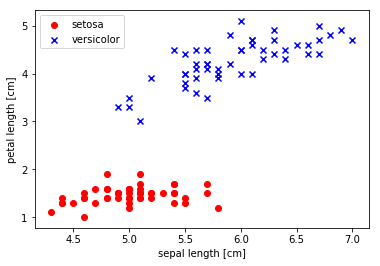

In [5]:
import pandas as pd


df = pd.read_csv('iris.data',header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

### ERROR CHART

Text(0, 0.5, 'Error')

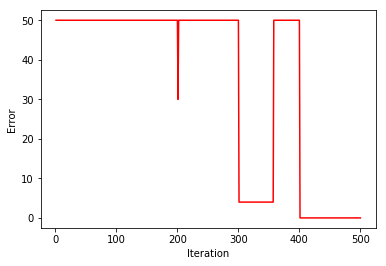

In [6]:
perceptron = Perceptron()

errors = list()
for i in range(1, 501):
    perceptron.n_iter = i
    perceptron.fit(X, y)
    errors.append(sum(perceptron.predict(X) != y))

plt.plot(range(1, len(errors) + 1), errors, color='r')
plt.xlabel('Iteration')
plt.ylabel('Error')

### DECISION BOUNDARY PLOT

W: [-1.98375655 -4.50611756  8.99471828]


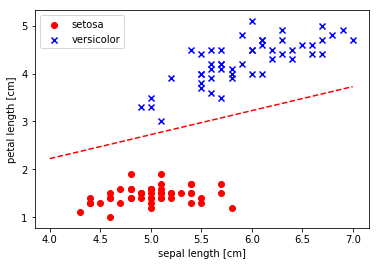

In [7]:
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

perceptron.n_iter = 501
perceptron.fit(X, y)
# DECISION BOUNDARY
W = perceptron.w_
SEPAL = [round(min(X[:, 0])), round(max(X[:, 0]))]
PETAL = [-((W[1] * sep) + W[0]) / W[2] for sep in SEPAL]

plt.plot(SEPAL, PETAL, 'r--')
print(f'W: {perceptron.w_}')

***
## QUESTION 2
## تمرین ۲
## Adaline

### Classifing the first 100 samples of iris data with 2 features (petal length and petal width)
### -1 and 1 are used as labels of setosa and versicolor classes respectively

In [8]:
from adaline import Adaline
from matplotlib.colors import ListedColormap  # PLOTTING COLOR SETTING

### Splitting the first 100 samples

In [9]:
y = df.iloc[0:100, 4].values

# SETTING LABELS OF SETOSA = -1 AND VERSICOLOR = 1
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [2, 3]].values

### Classifing the data using adaline gradient descent

In [10]:
adaline = Adaline()
adaline.fit(X, y)

### Plotting the data and the decision boundary

W: [-1.59387442  0.41187769  0.56707195]


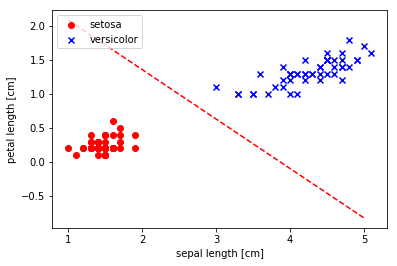

In [11]:
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# DECISION BOUNDARY
W = adaline.weight_
SEPAL = [round(min(X[:, 0])), round(max(X[:, 0]))]
PETAL = [-((W[1] * sep) + W[0]) / W[2] for sep in SEPAL]

plt.plot(SEPAL, PETAL, 'r--')
print(f'W: {W}')